In [91]:
# Importing  necessary libraries
import numpy as np
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt


In [92]:
# Loading and previewing dataset
amazon = pd.read_csv('amazon_product_reviews.csv')
amazon.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [93]:
# Removing unnecessary columns for sentiment analysis
reviews = amazon[['name','reviews.text','reviews.doRecommend']]
reviews.head()

,name,reviews.text,reviews.doRecommend
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,False
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,True
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,True
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,True
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,True


In [94]:
# Check for null values
reviews.isnull().sum()

name                   0
reviews.text           0
reviews.doRecommend    0
dtype: int64

In [106]:
# Grouping products that are the same except for colour into the same name
for i in range(len(reviews)):
    if "All-New Fire HD 8 Tablet" in reviews.loc[i, 'name']:
        reviews.loc[i, 'name'] = "All-New Fire HD 8 Tablet"
    elif "Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB" in reviews.loc[i, 'name']:
        reviews.loc[i, 'name'] = "Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB"
    elif "Kindle Oasis E-reader with Leather Charging Cover" in reviews.loc[i, 'name']:
        reviews.loc[i, 'name'] = "Kindle Oasis E-reader with Leather Charging Cover"

reviews['name'].value_counts()

name
All-New Fire HD 8 Tablet                                                                               1016
Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen                                         845
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB                                                       778
Amazon - Echo Plus w/ Built-In Hub - Silver                                                             590
Brand New Amazon Kindle Fire 16gb 7" Ips Display Tablet Wifi 16 Gb Blue                                 467
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black                                   371
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker                                                   225
Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers              159
Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum             106
Fire Tablet with Alexa,

In [95]:
# Preprocessing text 

# Loading language model
nlp = spacy.load('en_core_web_sm')
# Adding SpacyTextBlob for sentiment analysis
nlp.add_pipe('spacytextblob')

# Creating function for preprocessing
def preprocess(text):
    
    # Lowercasing and stripping text
    doc = nlp(text.lower().strip())
    # Lemmatizing and lowercasing tokens except stop words and punctuation
    processed = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    return ' '.join(processed)


In [96]:
# Process review text and add it to a new column 
processed_text = reviews['reviews.text'].apply(preprocess)
reviews['processed.text'] = processed_text

# Sanity check
reviews

C:\Users\avahe\AppData\Local\Temp\ipykernel_10460\966387235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['processed.text'] = processed_text


,name,reviews.text,reviews.doRecommend,processed.text
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,False,think big small paper turn like palm think sma...
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,True,kindle light easy use especially beach
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,True,not know use kindle go low end m happy little ...
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,True,100 happy purchase catch sale good price norma...
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,True,solid entry level kindle great kid gift kid fr...
...,...,...,...,...
4995,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This is a great tablet for the price. Amazon i...,True,great tablet price amazon good job
4996,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",This tablet is the perfect size and so easy to...,True,tablet perfect size easy use read play game pu...
4997,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",Purchased this for my son. Has room to upgrade...,True,purchase son room upgrade memory allow book ga...
4998,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",I had some thoughts about getting this for a 5...,True,thought get 5 year old screen protector case f...


In [97]:
test_examples = reviews.sample(n=5, random_state=42)

for index, row in test_examples.iterrows():
    review_text = row['processed.text']
    recommend = row['reviews.doRecommend']
    
    doc = nlp(review_text)
    sentiment = doc._.blob.polarity
    
    print("Review Text:", review_text)
    print("Actual Recommend Value:", recommend)
    print("Predicted Sentiment Score:", sentiment)
    print()

# From the sample, all looks accurate

Review Text: ifeel confident purchasing product good buy protection coverage
Actual Recommend Value: True
Predicted Sentiment Score: 0.6

Review Text: great tablet 3 yr old love profile option parental control
Actual Recommend Value: True
Predicted Sentiment Score: 0.4666666666666666

Review Text: tablet great small kid protect preloade games.adult use required.you careful mode child start try buy stuff
Actual Recommend Value: True
Predicted Sentiment Score: 0.15000000000000002

Review Text: great sound function ù§ô∏è alexa color style silver plus look great newly finish basement
Actual Recommend Value: True
Predicted Sentiment Score: 0.5340909090909091

Review Text: echo great addition home thrilled buy child family holiday season
Actual Recommend Value: True
Predicted Sentiment Score: 0.7



In [98]:
reviews_to_analyse = reviews['processed.text']
# Create empty list to append with sentiment results
sentiments = []

# Iterate through reviews, applying sentiment analysis
for review in reviews_to_analyse:
    doc = nlp(review)
    sentiment = doc._.blob.polarity
    # Append result to list
    sentiments.append(sentiment)

In [99]:
# Adding sentiment scores to dataframe
reviews['sentiment_score'] = sentiments
reviews.head()

C:\Users\avahe\AppData\Local\Temp\ipykernel_10460\2440896591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment_score'] = sentiments


,name,reviews.text,reviews.doRecommend,processed.text,sentiment_score
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I thought it would be as big as small paper bu...,False,think big small paper turn like palm think sma...,-0.016667
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",This kindle is light and easy to use especiall...,True,kindle light easy use especially beach,0.277778
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Didnt know how much i'd use a kindle so went f...,True,not know use kindle go low end m happy little ...,0.115625
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",I am 100 happy with my purchase. I caught it o...,True,100 happy purchase catch sale good price norma...,0.276786
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Solid entry level Kindle. Great for kids. Gift...,True,solid entry level kindle great kid gift kid fr...,0.432000


In [100]:
reviews['sentiment_score'].describe()

count    5000.000000
mean        0.359789
std         0.253790
min        -0.800000
25%         0.200000
50%         0.383002
75%         0.500000
max         1.000000
Name: sentiment_score, dtype: float64

In [117]:
reviews['reviews.doRecommend'].value_counts()

reviews.doRecommend
True     4765
False     235
Name: count, dtype: int64

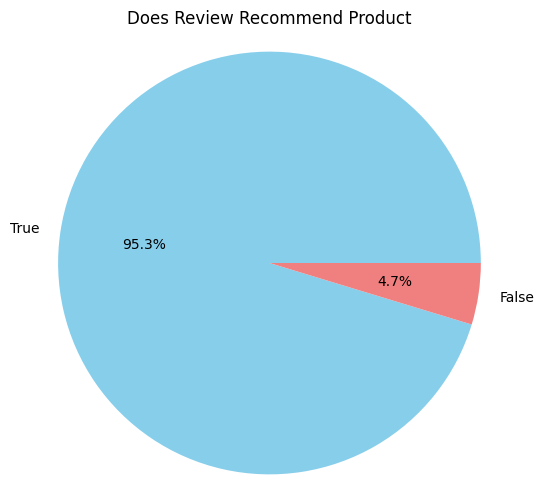

In [119]:
# Plotting pie chart
recommended_counts = reviews['reviews.doRecommend'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(recommended_counts, labels=recommended_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Does Review Recommend Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [101]:
# See review with most positive sentiment score
reviews.loc[reviews['sentiment_score'].idxmax(), 'reviews.text']

'Excellent lightweight way to take a lot of reading materials along when traveling.'

In [120]:
# See review with most negative sentiment score
reviews.loc[reviews['sentiment_score'].idxmin(), 'reviews.text']

'Too proprietary, the apps my daughter liked I could not install on it for her so basically it was worthless for me and I returned it.'

In [107]:
# Discover average sentiment by product
average_sentiment_by_product = reviews.groupby('name')['sentiment_score'].mean()
# Product with min average sentiment
min_product = average_sentiment_by_product.idxmin(), average_sentiment_by_product.min()
# Product with max average sentiment
max_product = average_sentiment_by_product.idxmax(), average_sentiment_by_product.max()

average_sentiment_by_product, min_product, max_product

(name
 All-New Fire HD 8 Tablet                                                                               0.350233
 Amazon - Echo Plus w/ Built-In Hub - Silver                                                            0.380345
 Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black                                                      0.302338
 Amazon - Kindle Voyage - 6" - 4GB - Black                                                              0.347341
 Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders    0.404663
 Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen                                        0.389334
 Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player       0.193056
 Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)                                                  0.341743
 Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker                                    

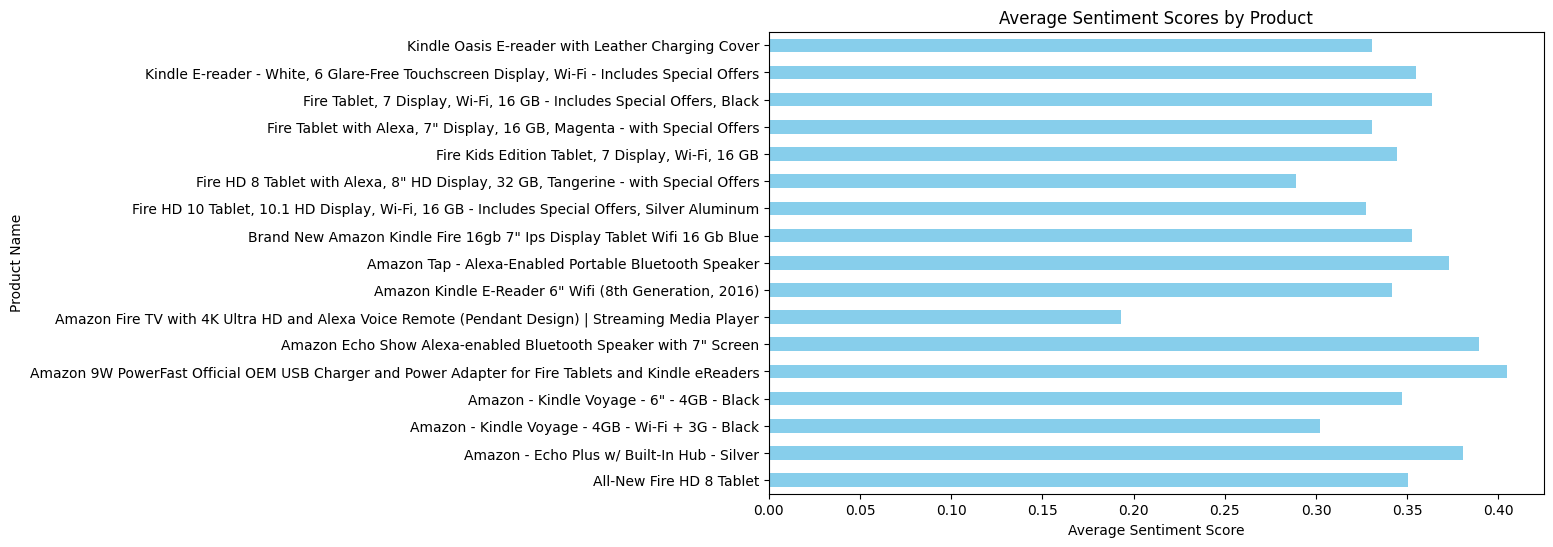

In [113]:
# Plot average sentiment score by product name
plt.figure(figsize=(10, 6))
average_sentiment_by_product.plot(kind='barh', color='skyblue')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Product Name')
plt.title('Average Sentiment Scores by Product')
plt.show()

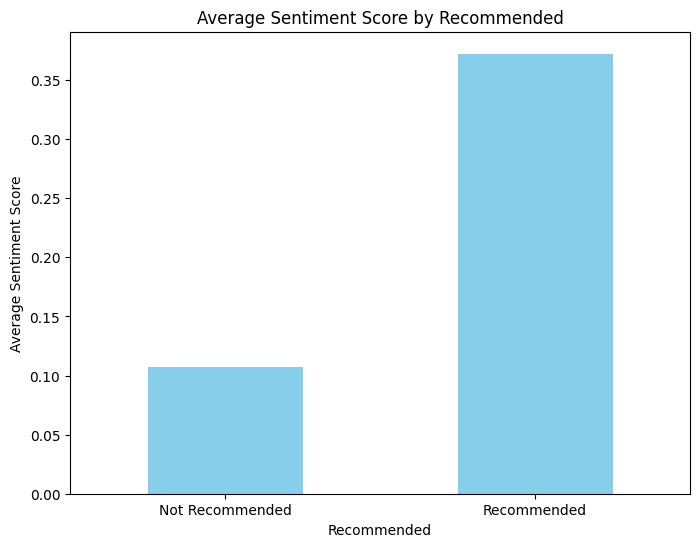

In [116]:
# Plot average sentiment score by recommended score
average_scores_by_recommended = reviews.groupby('reviews.doRecommend')['sentiment_score'].mean()

plt.figure(figsize=(8, 6))
average_scores_by_recommended.plot(kind='bar', color='skyblue')
plt.xlabel('Recommended')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Recommended')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'], rotation=0)
plt.show()

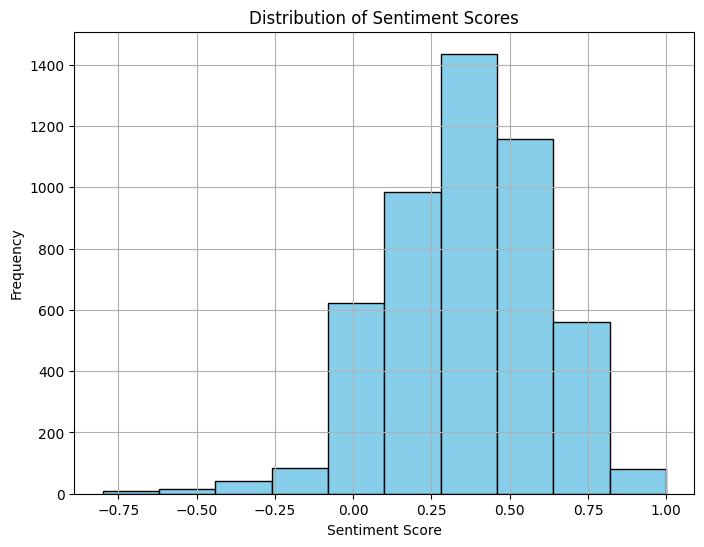

In [112]:
# Plot histogram of scores
plt.figure(figsize=(8, 6))
plt.hist(reviews['sentiment_score'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(True)
plt.show()